- https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

- **Data augmentation is a technique to artificially create new training data from existing training data. This is done by applying domain-specific techniques to examples from the training data that create new and different training examples.**

- Image data augmentation is perhaps the most well-known type of data augmentation and involves creating transformed versions of images in the training dataset that belong to the same class as the original image.

- Transforms include a range of operations from the field of image manipulation, such as shifts, flips, zooms, and much more.


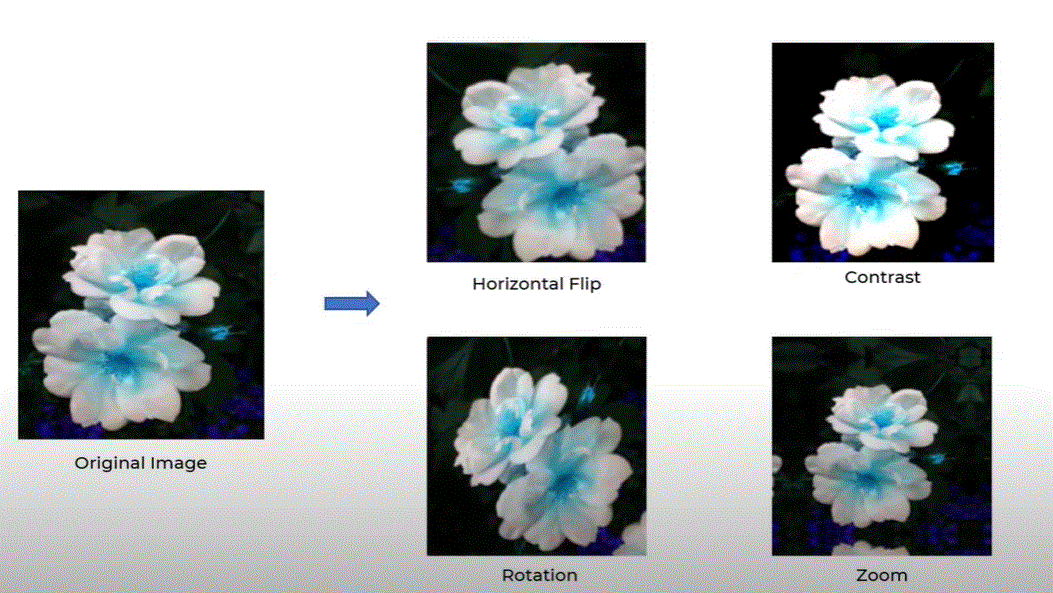

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import PIL # image library
import tensorflow as tf
import cv2

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url ="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar = True)

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

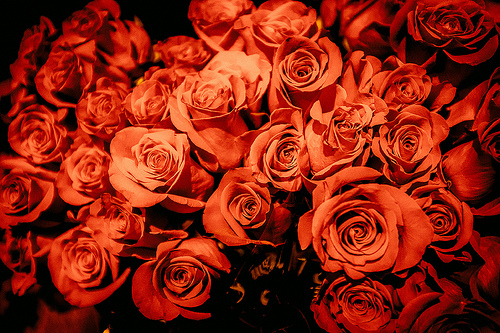

In [8]:
PIL.Image.open(str(roses[2]))

In [9]:
flower_images_dict ={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflower':list(data_dir.glob('sunflower/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [10]:
flower_labels_dict ={
    'roses' : 0,
    'daisy' : 1,
    'dandelion': 2,
    'sunflower': 3,
    'tulips':4,
}

In [11]:
img = cv2.imread(str(flower_images_dict['roses'][0]))

In [12]:
img.shape

(240, 179, 3)

In [13]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [ ]:
X,y = [],[]

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y, random_state = 0)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer = 'adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics = ['accuracy'])
model.fit(X_train_scaled,Y_train,epochs = 20)

In [ ]:
model.evaluate(X_test_scaled, Y_test)
# on train set : accuracy := 100% #
# on test Set : accuracy := 65%
# this is because of overfitting 

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

In [ ]:
predictions.shape

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
score

In [ ]:
np.argmax(score) # 

In [ ]:
Y_test[0] # not macthing with above cell output

In [ ]:
data_agumentation = keras.Sequential([layers.experimental.preprocessing.RandomContrast(0.9)])

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
data_agumentation(X)[0] # transformed array

In [ ]:
plt.axis('off')
plt.imshow(data_agumentation(X)[0].numpy().astype('uint8'))